In [1]:
from ucimlrepo import list_available_datasets

# Tampilkan semua dataset
list_available_datasets()

# Cari dataset dengan keyword tertentu
list_available_datasets(search='liver')


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [2]:
from ucimlrepo import fetch_ucirepo

# Import dataset Indian Liver Patient
liver_dataset = fetch_ucirepo(id=225)

# Ambil data fitur dan target
X = liver_dataset.data.features
y = liver_dataset.data.targets


In [3]:
X.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [4]:
y.head()

,Selector
0,1
1,1
2,1
3,1
4,1


In [5]:
y.value_counts()

Selector
1           416
2           167
Name: count, dtype: int64

In [6]:
y = y.replace({2:0})

In [7]:
y.value_counts()

Selector
1           416
0           167
Name: count, dtype: int64

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.concat([X,y], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

In [13]:
duplicated = df.duplicated().sum()
print(duplicated)

13


In [14]:
print([df.duplicated()])

[0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool]


In [15]:
df_clean = df.drop_duplicates()

In [16]:
df_clean = df_clean.dropna()

In [17]:
duplicated = df_clean.duplicated().sum()
print(duplicated)

0


In [18]:
df_clean

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


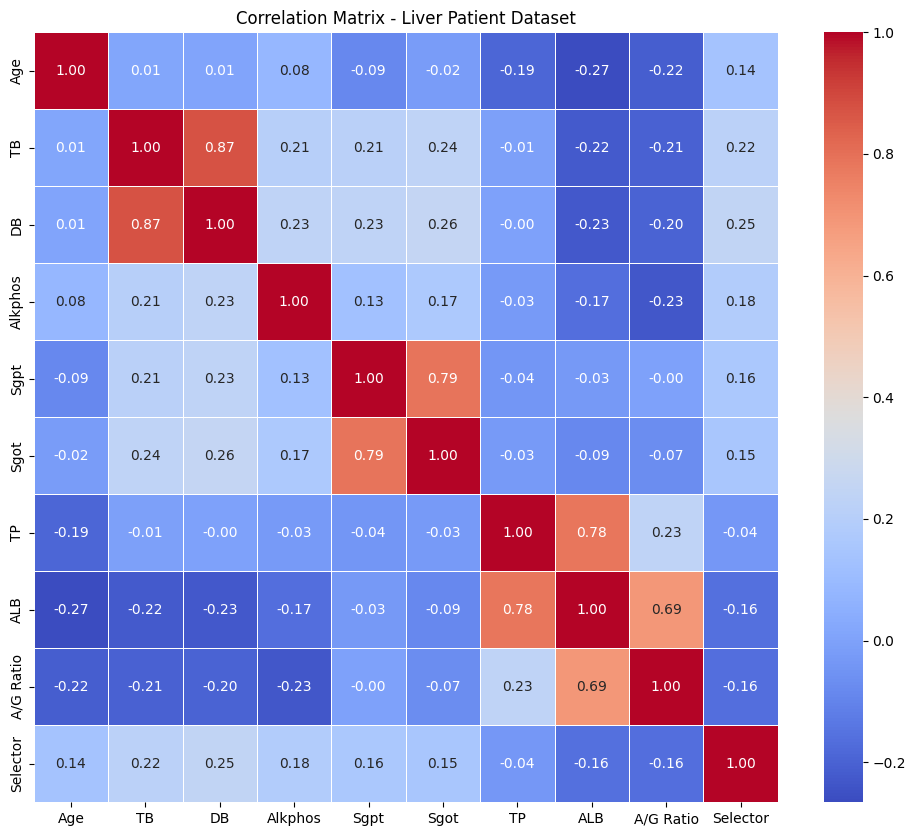

In [19]:
df_numeric = df.select_dtypes(include=[np.number])

# 2. Hitung korelasi
correlation_matrix = df_numeric.corr()

# 3. Plotting Heatmap
plt.figure(figsize=(12, 10)) # Mengatur ukuran gambar agar tidak gepeng

sns.heatmap(correlation_matrix, 
            annot=True,       # Menampilkan angkanya di dalam kotak
            fmt=".2f",        # Format angka (2 desimal)
            cmap="coolwarm",  # Warna: Merah (Positif), Biru (Negatif)
            linewidths=0.5)   # Garis pemisah antar kotak

plt.title("Correlation Matrix - Liver Patient Dataset")
plt.show()

/var/folders/sh/rr1hnjjn0t38l50lsbqf8bl80000gn/T/ipykernel_36473/2641423521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Selector', data=df, palette='viridis')


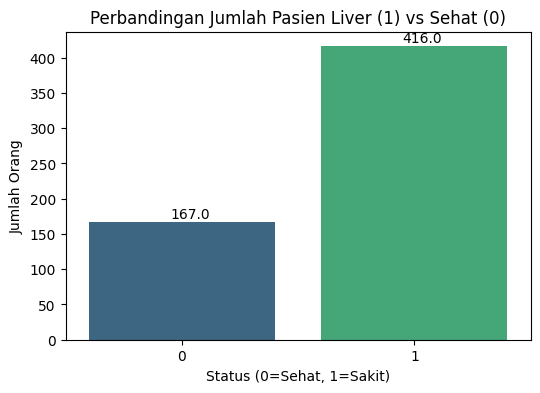

In [20]:
plt.figure(figsize=(6, 4))
# Menggunakan 'Selector' (0=Sehat, 1=Sakit)
ax = sns.countplot(x='Selector', data=df, palette='viridis')

plt.title('Perbandingan Jumlah Pasien Liver (1) vs Sehat (0)')
plt.xlabel('Status (0=Sehat, 1=Sakit)')
plt.ylabel('Jumlah Orang')

# Menambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 5))

plt.show()

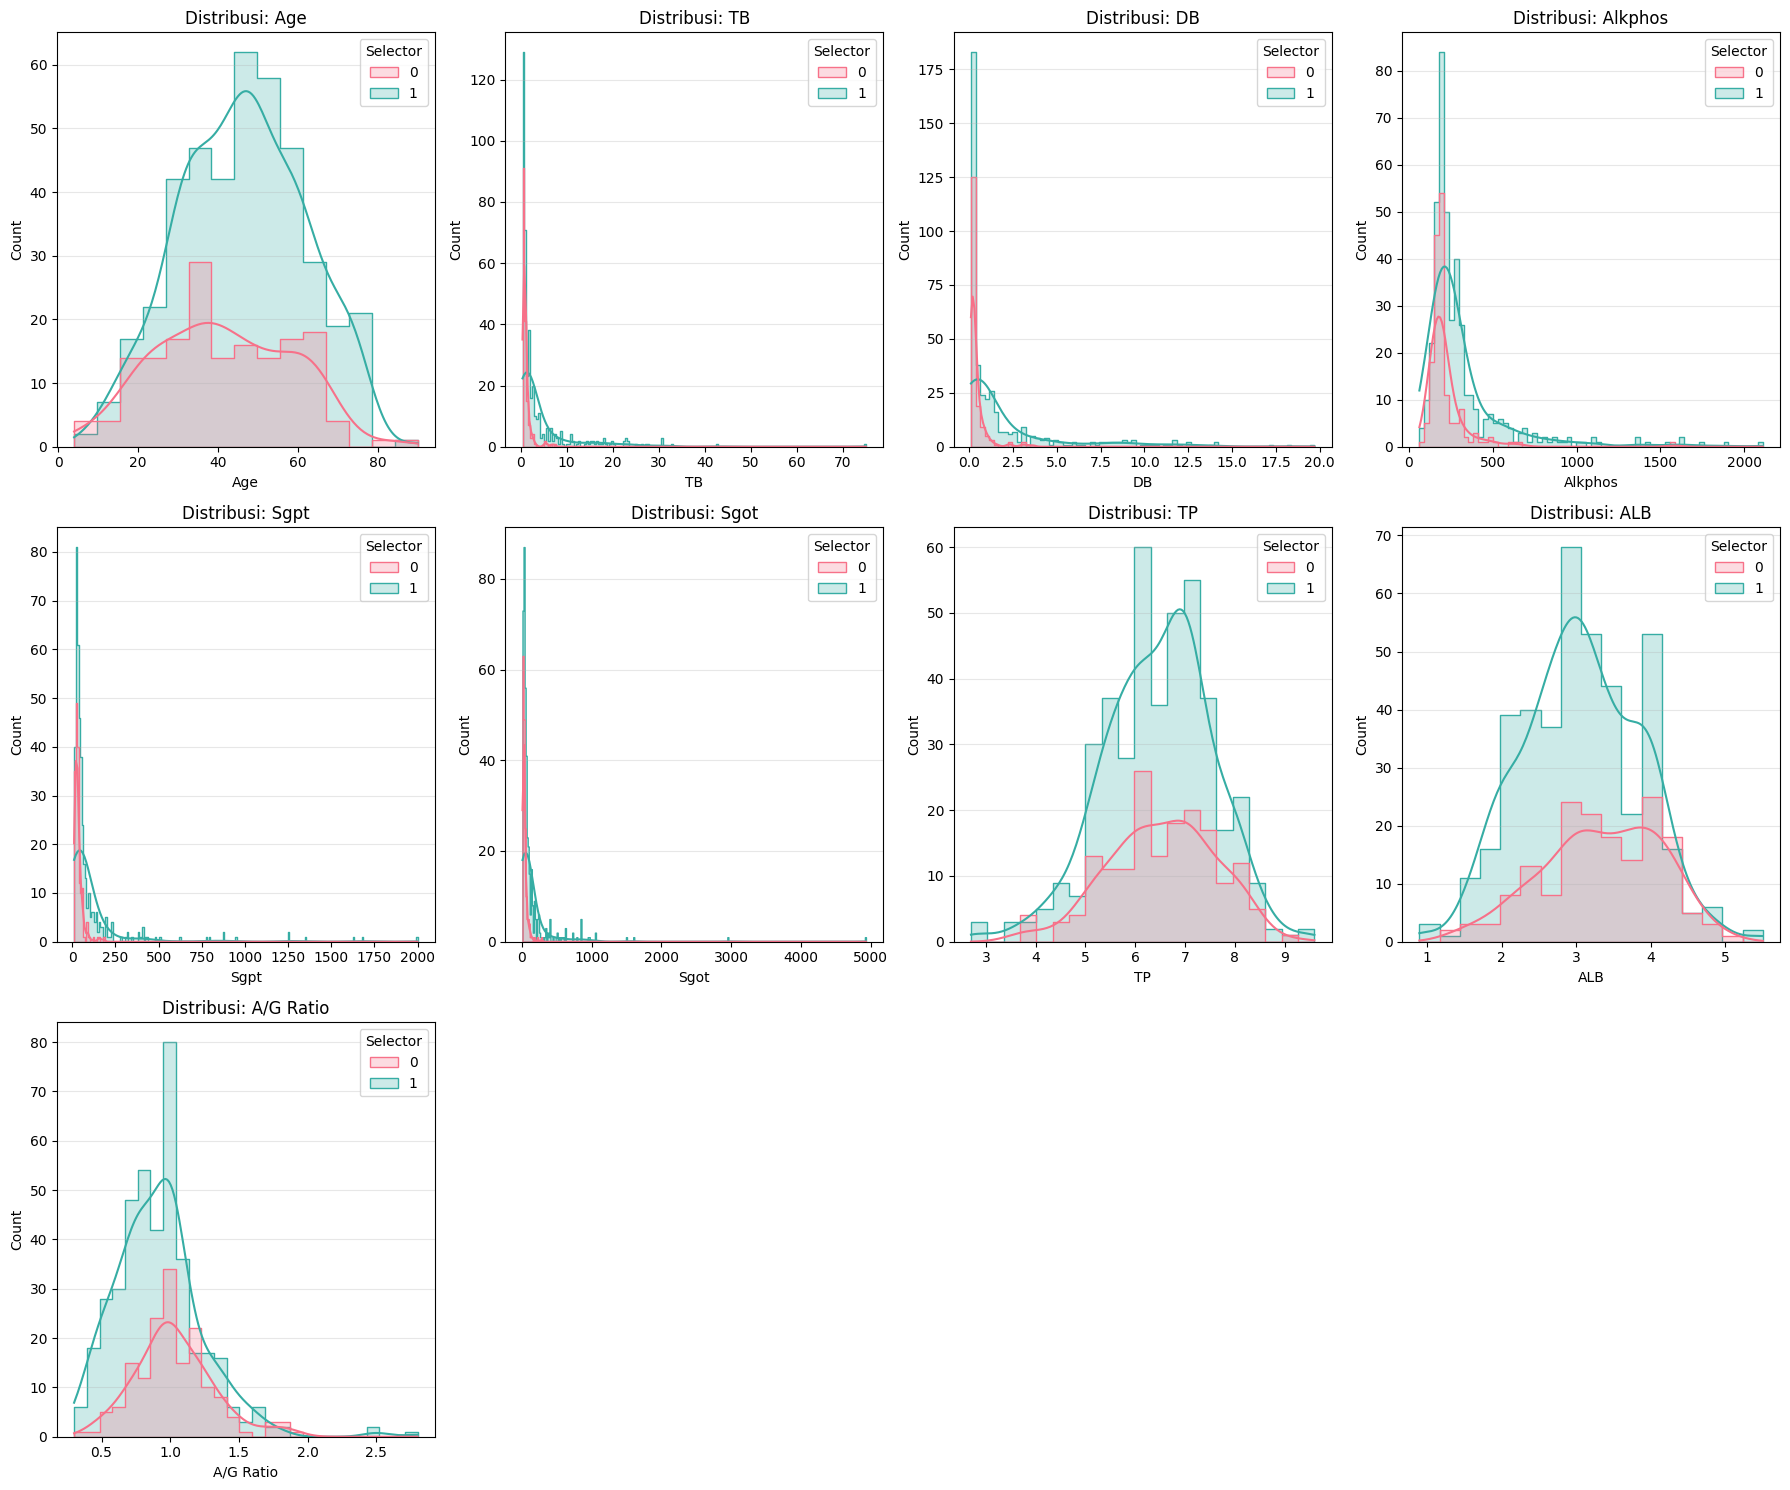

In [21]:
# Tentukan kolom numerik saja (buang kolom gender jika masih string)
# Kita juga buang 'Selector' agar tidak ikut di-plot sebagai fitur
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Selector')

# Setup Grid Gambar (Misal 3 kolom ke samping)
plt.figure(figsize=(18, 15))

for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1) # Mengatur posisi gambar (3 baris, 4 kolom)
    
    # Plot Histogram dengan garis kepadatan (KDE)
    # hue='Selector' membedakan warna berdasarkan target
    sns.histplot(data=df, x=col, hue='Selector', kde=True, element="step", palette='husl')
    
    plt.title(f'Distribusi: {col}')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/sh/rr1hnjjn0t38l50lsbqf8bl80000gn/T/ipykernel_36473/3463575729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Selector', y=col, data=df, palette='Set2')
/var/folders/sh/rr1hnjjn0t38l50lsbqf8bl80000gn/T/ipykernel_36473/3463575729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Selector', y=col, data=df, palette='Set2')
/var/folders/sh/rr1hnjjn0t38l50lsbqf8bl80000gn/T/ipykernel_36473/3463575729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Selector', y=col, data=df, palette='Set2')
/var/folders/sh/rr1hnjjn0

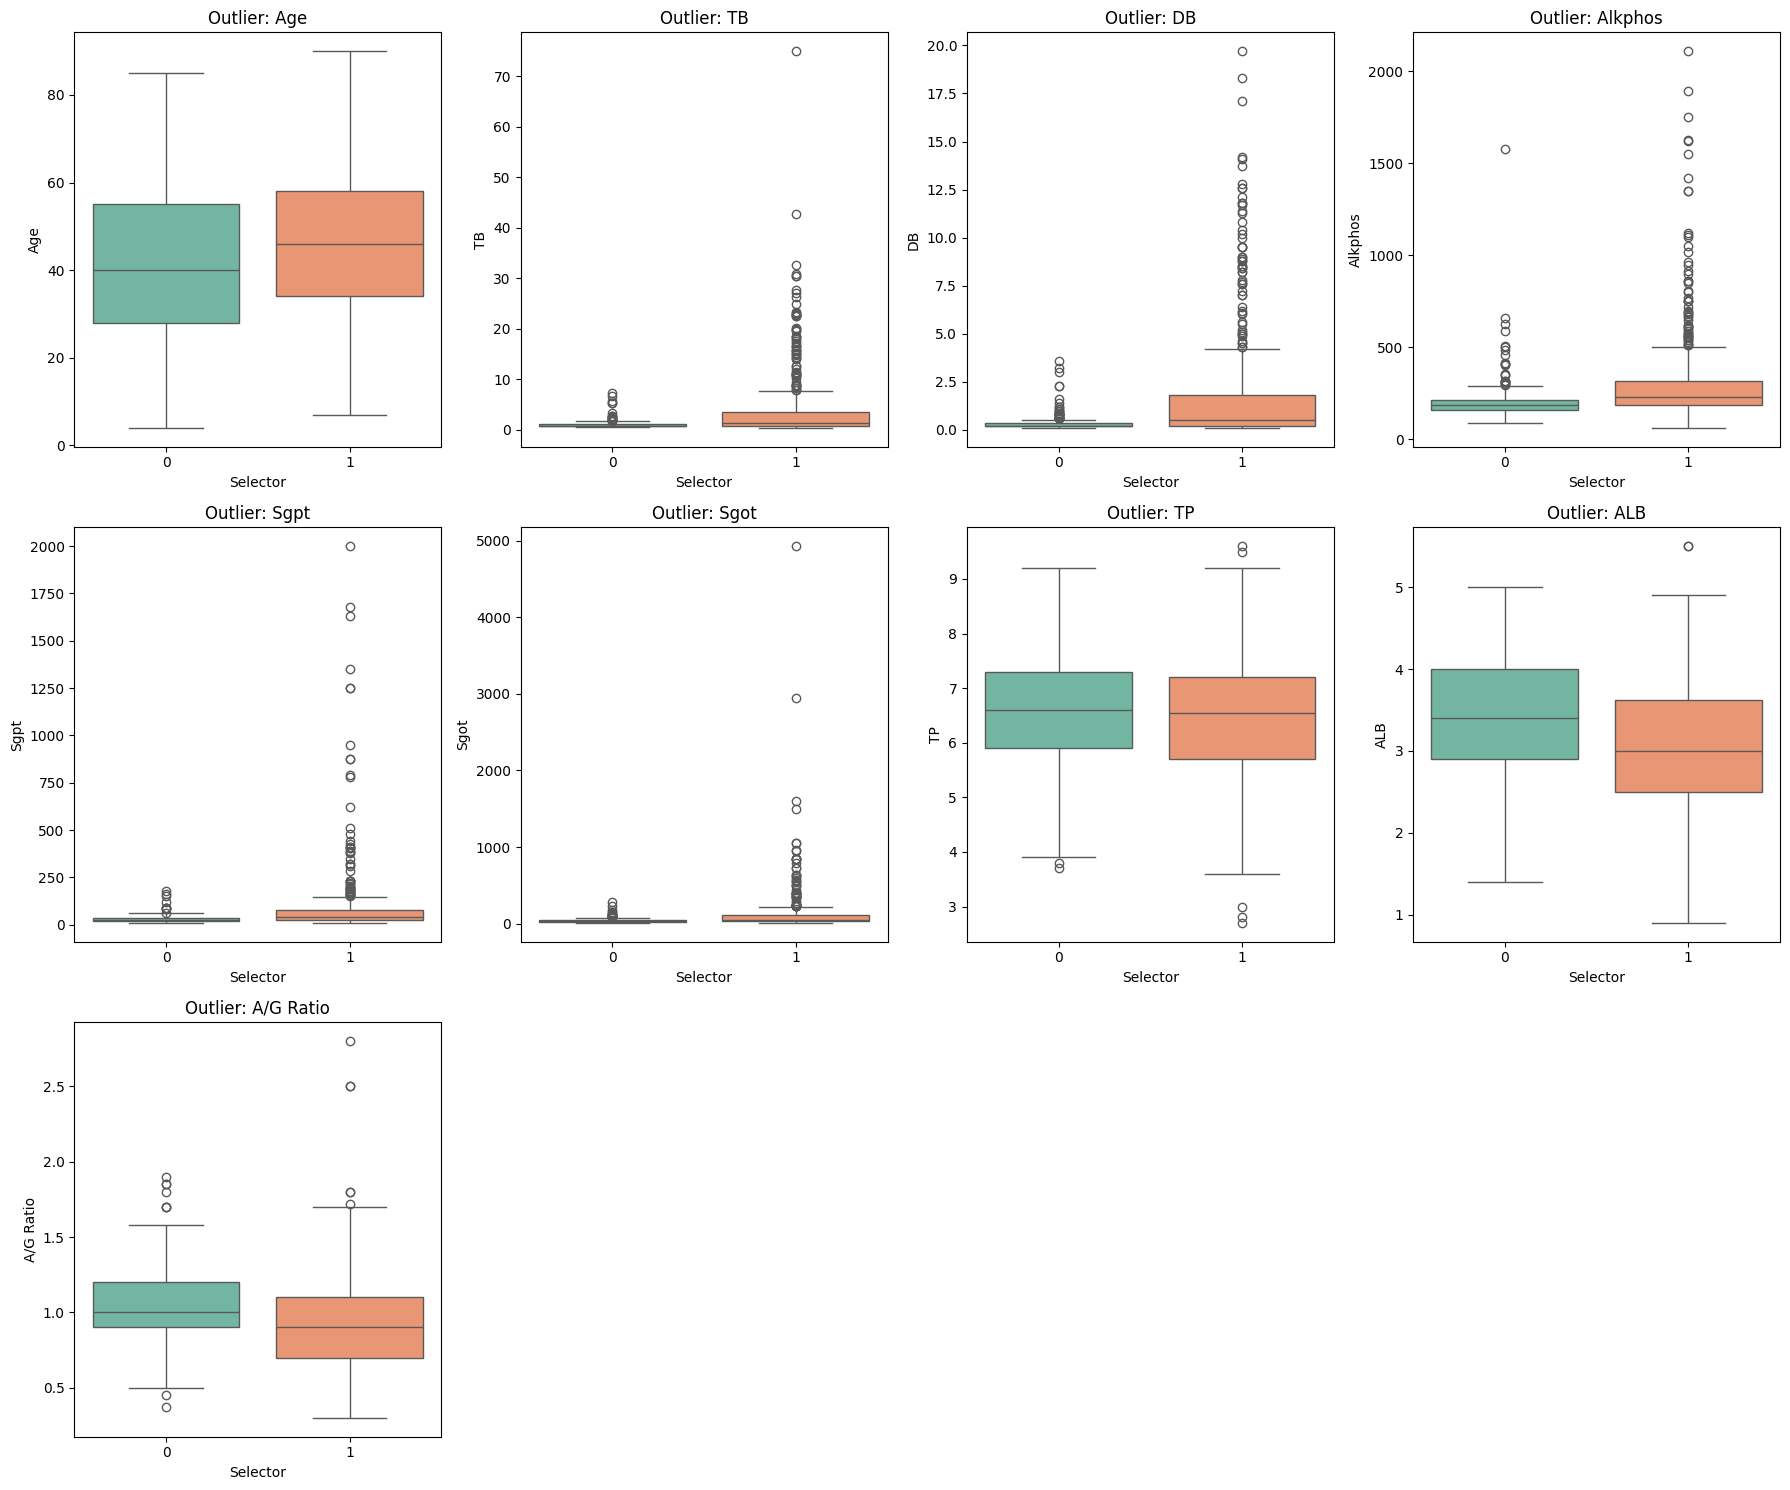

In [26]:
plt.figure(figsize=(18, 15))

for i, col in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    
    # Boxplot membandingkan Sehat (0) vs Sakit (1)
    sns.boxplot(x='Selector', y=col, data=df, palette='Set2')
    
    plt.title(f'Outlier: {col}')

plt.tight_layout()
plt.show()